In [22]:
#import libraries
from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil
import tensorflow as tf
assert tf.__version__.startswith('2')
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import pathlib

print('All Set!!')

All Set!!


In [4]:
#tensor version
print(tf.__version__)

2.6.0


In [5]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [8]:
#upload file from the disk
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


In [9]:
!unzip archive.zip

Archive:  archive.zip
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0378.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0381.JPG  
  inflating:

In [10]:
#Load dataset
data_dir ='/content/rice_leaf_diseases'
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [11]:
train_path = '/content/rice_leaf_diseases'
test_path = '/content/rice_leaf_diseases'

In [12]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [13]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

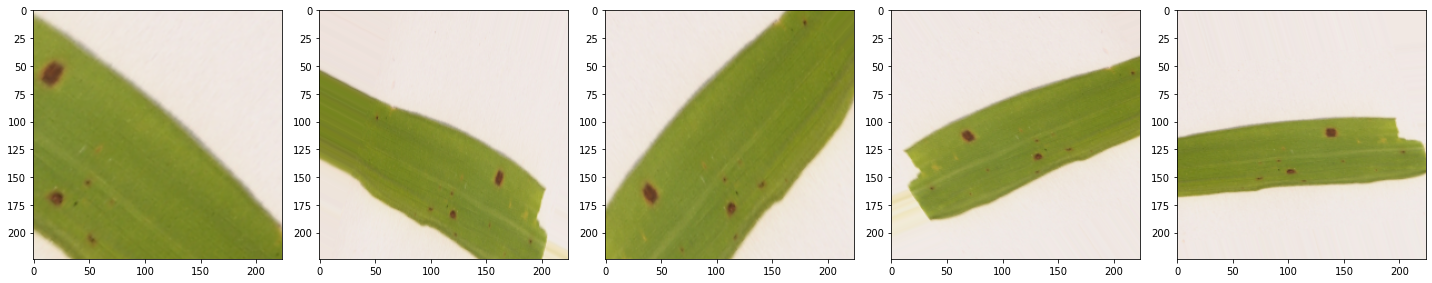

In [14]:
#few trained image's plot
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

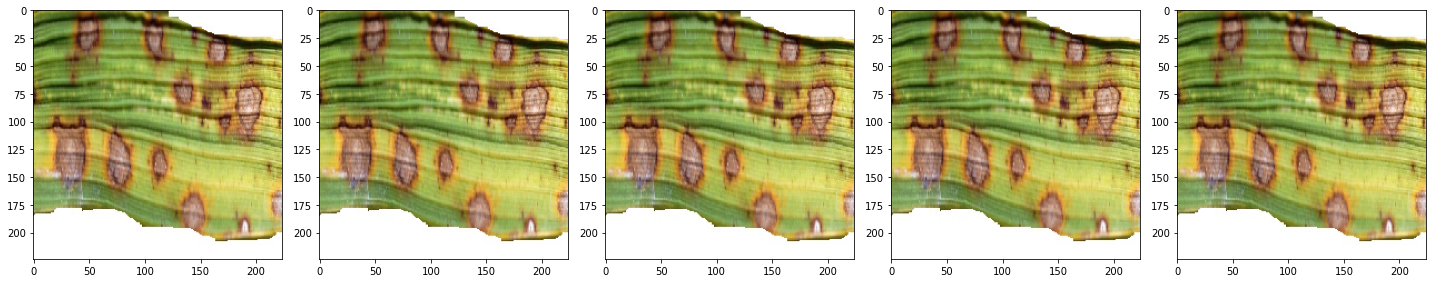

In [15]:
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [19]:
#Model Building
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [20]:
EPOCHS=50
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 1.5032 - accuracy: 0.3417 - val_loss: 1.0961 - val_accuracy: 0.3667
Epoch 2/50
15/15 [==============================] - 16s 1s/step - loss: 1.0599 - accuracy: 0.4333 - val_loss: 0.9641 - val_accuracy: 0.4500
Epoch 3/50
15/15 [==============================] - 20s 1s/step - loss: 1.0204 - accuracy: 0.5167 - val_loss: 0.9803 - val_accuracy: 0.6583
Epoch 4/50
15/15 [==============================] - 16s 1s/step - loss: 0.9337 - accuracy: 0.5750 - val_loss: 0.8528 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 16s 1s/step - loss: 0.9494 - accuracy: 0.5250 - val_loss: 0.8723 - val_accuracy: 0.4750
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 0.9278 - accuracy: 0.5833 - val_loss: 0.8056 - val_accuracy: 0.7167
Epoch 7/50
15/15 [==============================] - 16s 1s/step - loss: 1.0364 - accuracy: 0.4333 - val_loss: 0.8652 - val_accuracy: 0.5167
Epoch 8/50
15/15 [==

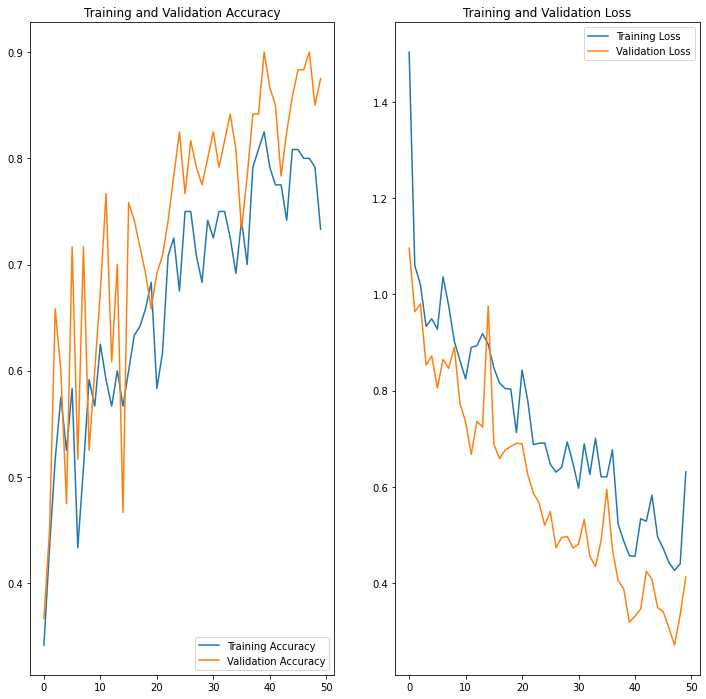

In [21]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
